# 制作自己的数据集

## 将模拟数据制作成内存对象

In [10]:
"""
Created on June 24, 2020
@author ClearTourch
"""
import tensorflow as tf
import numpy as np
import plotly.graph_objects as go 
from sklearn.utils import shuffle


print('TensorFlow version:', tf.__version__)
print('Numpy version:', np.__version__)

TensorFlow version: 2.2.0
Numpy version: 1.18.1


In [17]:
def generate_data(batchsize = 100):
    train_x = np.linspace(-1, 1, batchsize)
    train_y = 2 * train_x * np.random.randn(*train_x.shape) * 0.3 # y = 2x + 噪声
    yield shuffle(train_x, train_y)

    
def dataset():
    x = np.random.randn(5,5)
    for i in range(epochs):
        dataset = tf.data.Dataset.from_tensor_slices(x) 
    for element in dataset:    
        print(element)
dataset()

tf.Tensor([ 0.17920744  0.24660008 -0.01775632 -2.00813957  0.91230615], shape=(5,), dtype=float64)
tf.Tensor([ 1.12303526 -0.42042591  2.66425722  1.90691849 -0.60176231], shape=(5,), dtype=float64)
tf.Tensor([-0.12418905  0.65757852  0.59159321  1.4704943  -0.62979279], shape=(5,), dtype=float64)
tf.Tensor([-0.44208626  0.78875379  0.14803832  1.85806247  1.6981474 ], shape=(5,), dtype=float64)
tf.Tensor([-0.49634814  2.28517193  0.38268812 -0.82254025 -0.47254758], shape=(5,), dtype=float64)


## 将图片制成内存数据集
tf.keras.preprocessing

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing

def laod_image(path, target_size):
    image_gener = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_std_normalization=True,
                                                                  samplewise_std_normalization=True,
                                                                 rotation_range=5, brightness_range=(0,9),
                                                                horizontal_flip=True,
                                                                  vertical_flip=True,
                                                                  validation_split = 0.2
                                                                     )
    image_train = tf.keras.preprocessing.image.DirectoryIterator(path=path, 
                                                         image_gener, target_size=(28, 28))
    return image_train

def lenet_mdoel(image):                                                   
    tf.keras.backend.clear_session()
    lenet = models.Sequential()
    lenet.add(layers.Conv2D(filters=6, kernel_size = 5, activation = 'sigmoid', input_shape=(28, 28, 1)))
    lenet.add(layers.MaxPool2D(pool_size = 2, strides = 2))
    lenet.add(layers.Conv2D(filters = 16, kernel_size = 5, activation = 'sigmoid'))
    lenet.add(layers.MaxPool2D(pool_size = 2, strides = 2))
    lenet.add(layers.Flatten())
    lenet.add(layers.Dense(120, activation = 'sigmoid'))
    lenet.add(layers.Dense(84, activation = 'sigmoid'))
    lenet.add(layers.Dense(10, activation = 'sigmoid'))
    lenet.summary()
    lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    lenet.fit(image,epochs=20)
    lenet.save('./ModelTrained/lenet1')
    return lenet 




In [10]:
if __name__ == '__main__':
    target_size = (28, 28)
    path = './Data/tf_engeering/第4章 配套资源/4-3  将图片制作成内存对象数据集/mnist_digits_images/'
    lenet_mdoel(laod_image(path, target_size))

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 8000 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dens

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
250/250 [==============================] - 8s 31ms/step - loss: 2.2996 - accuracy: 0.1297
Epoch 2/20
250/250 [==============================] - 6s 23ms/step - loss: 1.6305 - accuracy: 0.4639
Epoch 3/20
250/250 [==============================] - 6s 23ms/step - loss: 1.1397 - accuracy: 0.6100
Epoch 4/20
250/250 [==============================] - 6s 23ms/step - loss: 1.0056 - accuracy: 0.6467
Epoch 5/20
250/250 [==============================] - 6s 23ms/step - loss: 0.9091 - accuracy: 0.6747
Epoch 6/20
250/250 [==============================] - 6s 23ms/step - loss: 0.8461 - accuracy: 0.7045
Epoch 7/20
250/250 [==============================] - 6s 23ms/step - loss: 0.7763 - accuracy: 0.7299
Epoch 8/20
250/250 [==============================] - 6s 23ms/step - loss: 0.7157 - accuracy: 0.7582
Epoch 9/20
250/250 [==============================] - 6s 23ms/step - loss: 0.6602 - accuracy: 0.7812
Epoch 10/20
250/250 [==============================] - 6s 23ms/step - loss: 0.6171 - accura

## 特征工程
以wide_deep模型来预测人口收入，应用特征工程对数据预处理。
数据集介绍：给数据集包含了20多个地区的人口数据，包含每个人的年龄、工作类别、权重值、教育、受教育年限、婚姻状况、职业、关系、种族、性别、收益、损失、每周工作时间、地区、收入档次（A~O），每一列代表一个特征，一共14个特征，48842个样本。

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses
import numpy as np 
import pandas as pd 
import plotly as py 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import seaborn as see

print('Tensorflow version:', tf.__version__)
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Plotly version:', py.__version__)

Tensorflow version: 2.2.0
Numpy version: 1.18.1
Pandas version: 1.0.1
Plotly version: 4.8.1


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_area,income_backet
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,area_A,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,area_A,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,area_A,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,area_A,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,area_M,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,area_A,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,area_A,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,area_A,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,area_A,<=50K


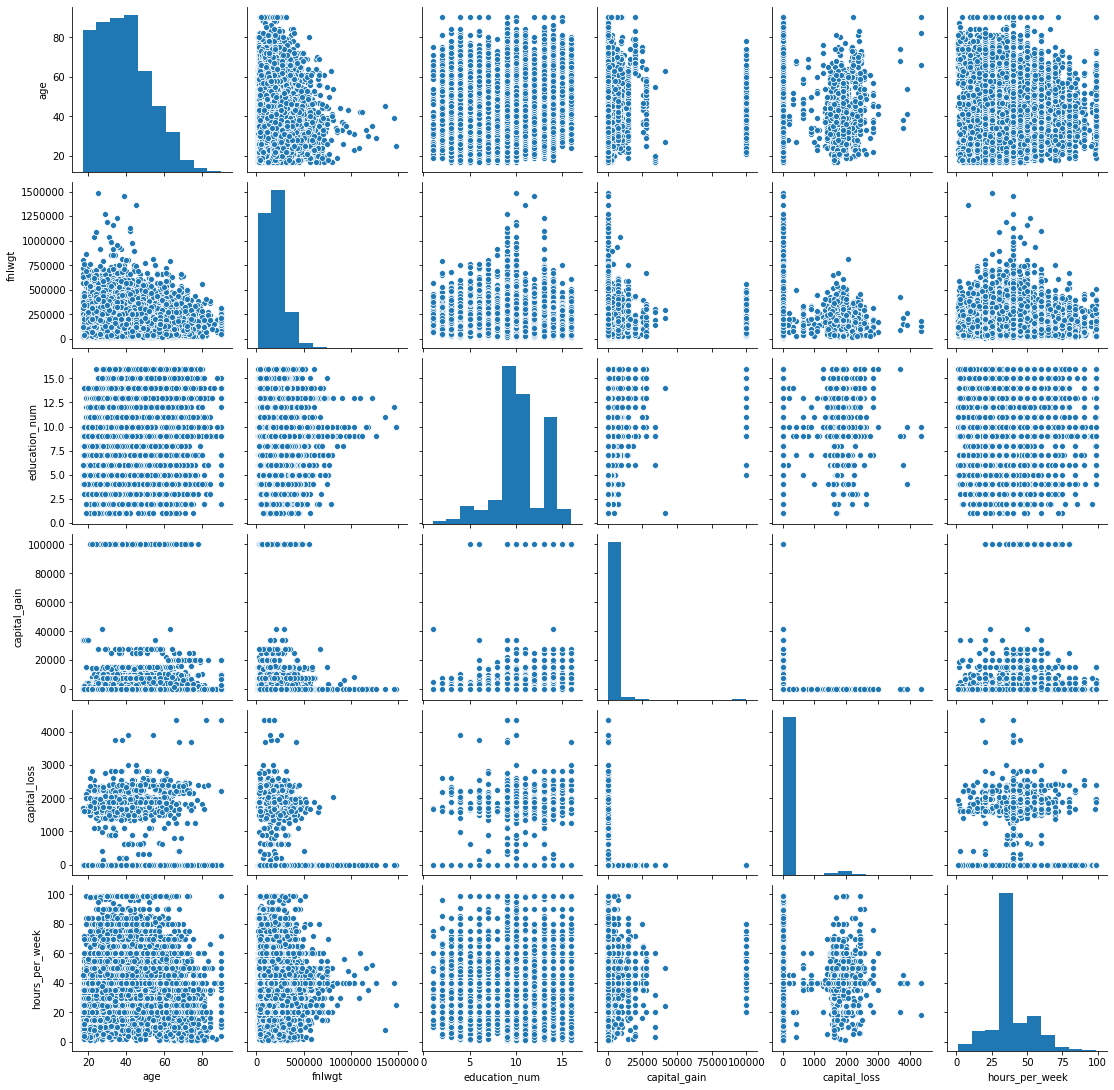

In [11]:
def data_analysis(path):
    column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                   'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss',
                   'hours_per_week', 'native_area', 'income_backet']
    df = pd.read_csv(path, names=column_names, skiprows=0, encoding='ISO-8859-1')
    
    df.loc[df['income_backet'] == '<=50k', 'income_bracket'] = 0 # 字段转化
    df.loc[df['income_backet'] == '>=50k', 'income_bracket'] = 1 # 字段转化
    df1 = df.dropna(how='all', axis=1)
    
    see.pairplot(df1)
    
    return df1

    
data_analysis(r'D:\PythonFile\Data\tf_engeering\第7章 配套资源\7-1  用wide and deep模型预测人口收入\income_data\adult.data.csv')
## 分析图中特征的相关性，可以舍去某些特征

ModuleNotFoundError: No module named 'torch'